vgg16
optimiser-adam
lr-0.001

In [1]:
import cv2 
import numpy as np
import glob
import pickle
#from sklearn.externals import joblib
from keras.applications.vgg16 import preprocess_input
from sklearn import preprocessing
from tensorflow import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import glob
import keras
from keras.models       import Model
from keras.applications.densenet import DenseNet121
from keras.applications.vgg16 import VGG16
from keras.applications.densenet import DenseNet121
from keras.models import Model
import glob
from keras.applications.vgg19 import VGG19


In [2]:
np.random.seed(10)

In [3]:
imgs=[]
final_output_84_84=[]

lables=[]
for filefilepath in glob.iglob('IITD Database - IIT Delhi/*/output/*'):
    #print(filefilepath)
    
    if filefilepath[-1] == 'p':
        
        
        #img	= cv2.imread(filefilepath)
        imgs_colored=cv2.imread(filefilepath)
        filefilepath=filefilepath[37:-41]
        #print(filefilepath)
        #print(imgs_colored)
        #filefilepath=filefilepath[26:]
        #print(filefilepath)
        label=filefilepath[:3]
        #print(label)
        imgs.append([imgs_colored,int(label)])
        #filefilepath=filefilepath[40:-41]
        

In [4]:
final_output_84_84=[]
lables=[]
for i,j in imgs:
        final_output_84_84.append(i)
        lables.append(j)

In [5]:
print(len(final_output_84_84))
print(len(lables))


24640
24640


In [6]:
img_size=(320,240)

In [7]:
y= tensorflow.keras.utils.to_categorical(lables, num_classes=225, dtype='float32')
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [8]:
final_output_84_84 = np.array(final_output_84_84,dtype="float32")/255
#final_output_84_84.shape


In [9]:

from keras.models       import Model
from tensorflow.keras.applications.vgg19 import VGG19

from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import InceptionResNetV2
from keras.applications.xception import Xception

#original_model = VGG19(include_top=False, input_shape=(480, 640, 3))
#original_model = DenseNet201(include_top=False,input_shape=(480,640,3))
#original_model = InceptionV3(include_top=False,input_shape=(320,240,3))
#original_model = InceptionResNetV2(include_top=False)
#original_model = Xception(include_top=False)

#bottleneck_input  = original_model.get_layer(index=0).input
#bottleneck_output = original_model.get_layer(index=-59).output
#bottleneck_model  = Model(inputs=bottleneck_input,  outputs=bottleneck_output)
#original_model.summary()
#bottleneck_model.summary()

In [10]:

#bottleneck_model = InceptionV3(include_top=False)
#Inception.summary()

In [11]:
'''
bottleneck_model    = VGG19(include_top=False, input_shape=(320,240,3))
bottleneck_model.summary()
'''
bottleneck_model   = VGG16(include_top=False,input_shape=(320, 240, 3))
bottleneck_model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 320, 240, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 320, 240, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 320, 240, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 160, 120, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 160, 120, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 160, 120, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 80, 60, 128)       0     

In [12]:

test = final_output_84_84[0]
test = test.reshape(1,img_size[0], img_size[1],3)
#print(test)
test_shape = bottleneck_model.predict(test).shape
print(test_shape)
shape = (test.shape[0], test_shape[1],test_shape[2],test_shape[3])
print(shape)
#print(shape[1:])

(1, 10, 7, 512)
(1, 10, 7, 512)


In [14]:

bottelneck_features = []
for i in final_output_84_84:
    #i = i.reshape(1, 480, 640,3)
    i = i.reshape(1, img_size[0], img_size[1],3)
    bottelneck_features.append(bottleneck_model.predict(i))
    #print(len(bottelneck_features))
    
    #if len(bottelneck_features)==20000:
        #break


In [15]:
    
bottelneck_features=np.array(bottelneck_features)
bottelneck_features = bottelneck_features.reshape(24640,10,7,512)
#bottelneck_features = bottelneck_features.reshape(50, 15, 20, 512)
print(bottelneck_features.shape)
# print(bottelneck_features)

(24640, 10, 7, 512)


In [28]:
import pandas as pd
import csv
from numpy import savetxt
np.save('file_name',bottelneck_features)
#savetxt('bottelneck_features.csv',bottelneck_features,delimiter=',')
#bottelneck_features=pd.DataFrame(bottelneck_features)
#bottelneck_features.to_csv('bottelneck_features.csv')

In [ ]:
 #print(np.amax(ubiris_features)  )
#  print(shape)
# bottelneck_features =  bottelneck_features.reshape(shape) #4, 6, 512
# print(bottelneck_features.shape)

In [29]:
load=np.load('file_name.npy')

In [34]:
load


array([[[[0.02798313, 0.        , 0.        , ..., 0.        ,
          0.46579114, 0.        ],
         [0.2958233 , 0.        , 0.        , ..., 0.        ,
          0.64800936, 0.        ],
         [0.14426225, 0.        , 0.        , ..., 0.        ,
          0.8330637 , 0.        ],
         ...,
         [0.18641563, 0.        , 0.        , ..., 0.        ,
          0.8012244 , 0.        ],
         [0.37240338, 0.        , 0.        , ..., 0.        ,
          0.76512843, 0.        ],
         [0.22586061, 0.        , 0.        , ..., 0.        ,
          0.6298776 , 0.        ]],

        [[0.42416352, 0.        , 0.        , ..., 0.        ,
          0.4454557 , 0.        ],
         [0.6591859 , 0.        , 0.09738186, ..., 0.        ,
          0.6153988 , 0.        ],
         [0.61284804, 0.        , 0.14185056, ..., 0.        ,
          0.7809459 , 0.        ],
         ...,
         [0.47137606, 0.        , 0.28788167, ..., 0.        ,
          0.7851858 , 0. 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import svm

(X_train, X_test, y_train, y_test) = train_test_split(bottelneck_features, y,test_size=0.3, random_state=1250)

In [17]:
from sklearn.metrics import accuracy_score
bottelneck_features[2].shape

(10, 7, 512)

In [18]:

from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers


model = Sequential()
model.add(Flatten(input_shape=(shape[1:])))#4, 6, 512
#model.add(Dense(500, activation='relu'))
#model.add(Dropout(0.8))
model.add(Dense(225, activation='softmax'))
#sgd = optimizers.SGD(learning_rate=0.1)
adam = optimizers.Adam(learning_rate=0.0001)


model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=[tensorflow.keras.metrics.CategoricalAccuracy()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 35840)             0         
_________________________________________________________________
dense (Dense)                (None, 225)               8064225   
Total params: 8,064,225
Trainable params: 8,064,225
Non-trainable params: 0
_________________________________________________________________


In [19]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='casia_interval_dense_net_0.2_adam.hdf5', verbose=1, save_best_only=True)
#X_train, X_test, y_train, y_test

history=model.fit(x = X_train, y = y_train, batch_size= 5, epochs=20, validation_data = (X_test, y_test), shuffle=True, verbose=1)

Epoch 1/20
3450/3450 [==============================] - 127s 37ms/step - loss: 10.2429 - categorical_accuracy: 0.1821 - val_loss: 7.2097 - val_categorical_accuracy: 0.4451
Epoch 2/20
3450/3450 [==============================] - 127s 37ms/step - loss: 5.3302 - categorical_accuracy: 0.5401 - val_loss: 6.4059 - val_categorical_accuracy: 0.5312
Epoch 3/20
3450/3450 [==============================] - 127s 37ms/step - loss: 4.1434 - categorical_accuracy: 0.6439 - val_loss: 5.6799 - val_categorical_accuracy: 0.5896
Epoch 4/20
3450/3450 [==============================] - 127s 37ms/step - loss: 3.3709 - categorical_accuracy: 0.7090 - val_loss: 5.6599 - val_categorical_accuracy: 0.6227
Epoch 5/20
3450/3450 [==============================] - 127s 37ms/step - loss: 2.7444 - categorical_accuracy: 0.7540 - val_loss: 6.3795 - val_categorical_accuracy: 0.6347
Epoch 6/20
3450/3450 [==============================] - 127s 37ms/step - loss: 2.4586 - categorical_accuracy: 0.7883 - val_loss: 6.0178 - val_ca

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


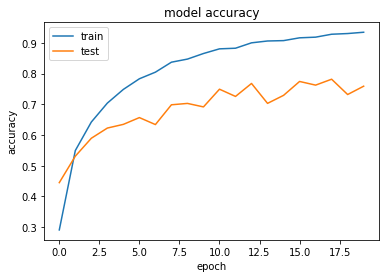

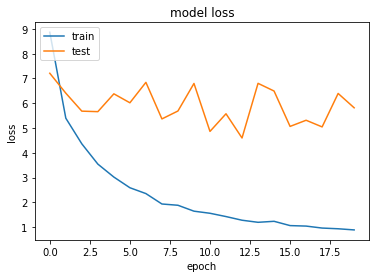

In [20]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
model.save('iitdvgg16.h5')